In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)
%matplotlib inline

In [2]:
paper = pd.read_csv('PreisMoatStanley2013.dat',
                       delimiter=' ',
                       parse_dates=[0,1,100,101])
paper[:5]

  Google Start Date Google End Date     arts  banking   ...       water  \
0        2004-01-04      2004-01-10  0.95667  0.19333   ...     1.91333   
1        2004-01-11      2004-01-17  0.97000  0.20333   ...     1.93333   
2        2004-01-18      2004-01-24  0.92667  0.19667   ...     1.89333   
3        2004-01-25      2004-01-31  0.95000  0.19667   ...     1.92000   
4        2004-02-01      2004-02-07  0.89333  0.20333   ...     1.88667   

     world  DJIA Date  DJIA Closing Price  
0  4.83333 2004-01-12            10485.18  
1  4.76667 2004-01-20            10528.66  
2  4.60000 2004-01-26            10702.51  
3  4.53333 2004-02-02            10499.18  
4  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]

In [3]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'], 'debt': paper['debt'].astype(np.float64),'DJIADate': paper['DJIA Date'], 'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

In [4]:
data[:5]

   DJIAClose   DJIADate   GoogleWE     debt
0   10485.18 2004-01-12 2004-01-10  0.21000
1   10528.66 2004-01-20 2004-01-17  0.21000
2   10702.51 2004-01-26 2004-01-24  0.21000
3   10499.18 2004-02-02 2004-01-31  0.21333
4   10579.03 2004-02-09 2004-02-07  0.20000

In [5]:
import Quandl

In [6]:
djia = Quandl.get("YAHOO/INDEX_DJI",
                     trim_start='2004-01-01',
                     trim_end='2011-03-05')

In [7]:
djia[:3]

               Open     High      Low    Close   Volume  Adjusted Close
Date                                                                   
2004-01-02  10452.7  10527.0  10384.3  10409.9  1688900         10409.9
2004-01-05  10411.9  10544.1  10411.9  10544.1  2212900         10544.1
2004-01-06  10543.9  10549.2  10499.9  10538.7  1914600         10538.7

In [8]:
djia_closes = djia['Close'].reset_index() #takes index column with it
djia_closes[:3]

        Date    Close
0 2004-01-02  10409.9
1 2004-01-05  10544.1
2 2004-01-06  10538.7

In [9]:
djia_closes[:10]

        Date    Close
0 2004-01-02  10409.9
1 2004-01-05  10544.1
2 2004-01-06  10538.7
3 2004-01-07  10529.0
4 2004-01-08  10592.4
5 2004-01-09  10458.9
6 2004-01-12  10485.2
7 2004-01-13  10427.2
8 2004-01-14  10538.4
9 2004-01-15  10553.9

In [10]:
data = pd.merge(data, djia_closes, left_on='DJIADate', right_on='Date')
data.drop(['DJIADate'], inplace=True, axis=1)
data = data.set_index('Date')
data[:3]

            DJIAClose   GoogleWE  debt    Close
Date                                           
2004-01-12   10485.18 2004-01-10  0.21  10485.2
2004-01-20   10528.66 2004-01-17  0.21  10528.7
2004-01-26   10702.51 2004-01-24  0.21  10702.5

In [11]:
data[:10]

            DJIAClose   GoogleWE     debt    Close
Date                                              
2004-01-12   10485.18 2004-01-10  0.21000  10485.2
2004-01-20   10528.66 2004-01-17  0.21000  10528.7
2004-01-26   10702.51 2004-01-24  0.21000  10702.5
2004-02-02   10499.18 2004-01-31  0.21333  10499.2
2004-02-09   10579.03 2004-02-07  0.20000  10579.0
2004-02-17   10714.88 2004-02-14  0.20333  10714.9
2004-02-23   10609.62 2004-02-21  0.20000  10609.6
2004-03-01   10678.14 2004-02-28  0.20000  10678.1
2004-03-08   10529.48 2004-03-06  0.19667  10529.5
2004-03-15   10102.89 2004-03-13  0.19667  10102.9

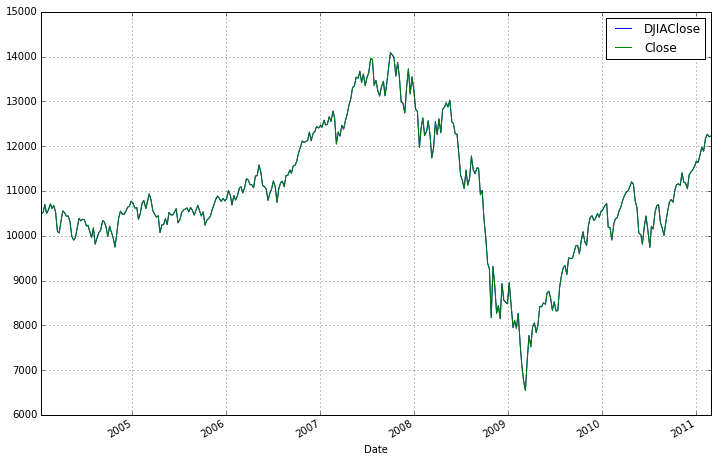

In [12]:
data[['DJIAClose', 'Close']].plot(figsize=(12,8)); #determine if DJIA datasets are similar

In [13]:
(data['DJIAClose']-data['Close']).describe() #determine if datasets are similar

count    373.00000
mean      -0.00493
std        0.03003
min       -0.05000
25%       -0.03000
50%       -0.01000
75%        0.02000
max        0.04000
dtype: float64

In [14]:
data[['DJIAClose', 'Close']].corr()

           DJIAClose  Close
DJIAClose          1      1
Close              1      1

In [16]:
!head debt_google.csv

Web Search interest: debt
Worldwide 2004 - present

Interest over time
Week,debt
2004-01-04 - 2004-01-10,35
2004-01-11 - 2004-01-17,37
2004-01-18 - 2004-01-24,36
2004-01-25 - 2004-01-31,38
2004-02-01 - 2004-02-07,38


In [23]:
from StringIO import StringIO
with open("debt_google.csv") as f:
       data_section = f.read().split('\n\n')[1]
       trends_data = pd.read_csv(
           StringIO(data_section),
           header=1, index_col='Week',
           converters={
               'Week': lambda x: pd.to_datetime(x.split(' ')[-1])
           }
       )
our_debt_trends = trends_data['2004-01-01':'2011-02-28'].reset_index()

In [24]:
our_debt_trends[:5]

        Week  debt
0 2004-01-10    35
1 2004-01-17    37
2 2004-01-24    36
3 2004-01-31    38
4 2004-02-07    38

In [25]:
final = pd.merge(data.reset_index(), our_debt_trends,
                    left_on='GoogleWE', right_on='Week',
                    suffixes=['_P', '_O'])
final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final[:5]

            DJIAClose   GoogleWE   debt_P    Close  debt_O
Date                                                      
2004-01-12   10485.18 2004-01-10  0.21000  10485.2      35
2004-01-20   10528.66 2004-01-17  0.21000  10528.7      37
2004-01-26   10702.51 2004-01-24  0.21000  10702.5      36
2004-02-02   10499.18 2004-01-31  0.21333  10499.2      38
2004-02-09   10579.03 2004-02-07  0.20000  10579.0      38

In [27]:
combined_trends = final[['GoogleWE', 'debt_P', 'debt_O']].set_index('GoogleWE')
combined_trends[:5]

             debt_P  debt_O
GoogleWE                   
2004-01-10  0.21000      35
2004-01-17  0.21000      37
2004-01-24  0.21000      36
2004-01-31  0.21333      38
2004-02-07  0.20000      38

In [28]:
combined_trends.corr()

         debt_P   debt_O
debt_P  1.00000  0.71036
debt_O  0.71036  1.00000

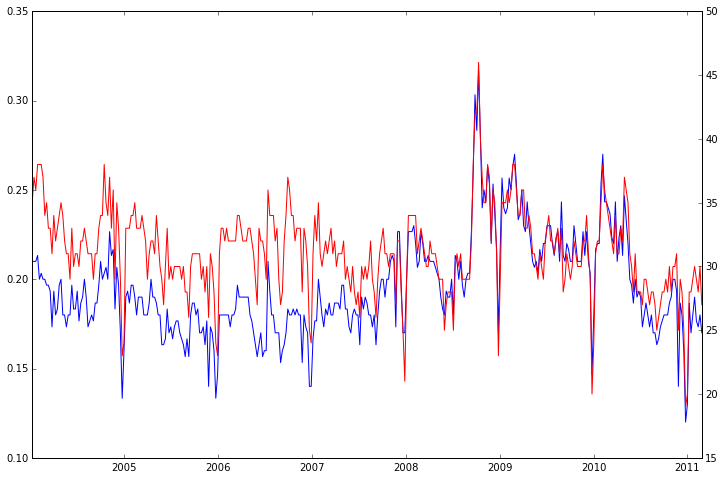

In [31]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index, combined_trends.debt_P, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,combined_trends.debt_O, color='r')
plt.show()